# RECRUITEMENT TASK
### NAME: MITHILESH RC
### REG NO: RA2311047010155
### DEPARTMENT/YEAR:CINTEL/2

### You are provided with a dataset containing stock market data for various companies, including columns like Open, High, Low, Previous Close, Last Traded Price, Change, Percentage Change, and Volume.
1.	Data Preprocessing:
○	Clean the dataset, handle missing values, and encode categorical variables (e.g., "Industry" and "Series").
2.	Regression:
○	Build a model to predict the Last Traded Price using relevant features.
○	Evaluate the model with metrics such as RMSE or MAE.
3.	Classification:
○	Convert Percentage Change into a binary target (positive or negative).
○	Apply SVM and LSVM models to classify this target.
○	Evaluate the models using accuracy, precision, recall, and F1-score.
4.	Random Forest:
○	Implement a Random Forest model for both regression (predicting Last Traded Price) and classification (predicting Percentage Change).

○	Compare the results of Random Forest with the SVM and regression models.


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
stock_data = pd.read_excel('/content/nifty_500.csv')

# Encoding categorical variables
label_encoder_industry = LabelEncoder()
label_encoder_series = LabelEncoder()

stock_data['Industry'] = label_encoder_industry.fit_transform(stock_data['Industry'])
stock_data['Series'] = label_encoder_series.fit_transform(stock_data['Series'])

# Convert all relevant numeric columns to numeric types
numeric_columns = ['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Last Traded Price']
stock_data[numeric_columns] = stock_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values in numeric columns
stock_data[numeric_columns] = stock_data[numeric_columns].fillna(stock_data[numeric_columns].mean())

# Define features and target for regression
X = stock_data[['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Industry', 'Series']]
y = stock_data['Last Traded Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the regression model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert Percentage Change into binary target (positive = 1, negative = 0)
stock_data['Binary Change'] = (stock_data['Percentage Change'] > 0).astype(int)

# Define features and target for classification
X_class = stock_data[['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Industry', 'Series']]
y_class = stock_data['Binary Change']

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Implementing SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_class_svm = svm_model.predict(X_test_class)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_class, y_pred_class_svm)
precision_svm = precision_score(y_test_class, y_pred_class_svm)
recall_svm = recall_score(y_test_class, y_pred_class_svm)
f1_svm = f1_score(y_test_class, y_pred_class_svm)

print(f"Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1-Score: {f1_svm}")

from sklearn.ensemble import RandomForestClassifier

# Implementing Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_class_rf = rf_classifier.predict(X_test_class)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
precision_rf = precision_score(y_test_class, y_pred_class_rf)
recall_rf = recall_score(y_test_class, y_pred_class_rf)
f1_rf = f1_score(y_test_class, y_pred_class_rf)

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}")




RMSE: 397.5303247379921, MAE: 69.50941089108906
Accuracy: 0.9900990099009901, Precision: 0.9807692307692307, Recall: 1.0, F1-Score: 0.9902912621359222
Random Forest - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0


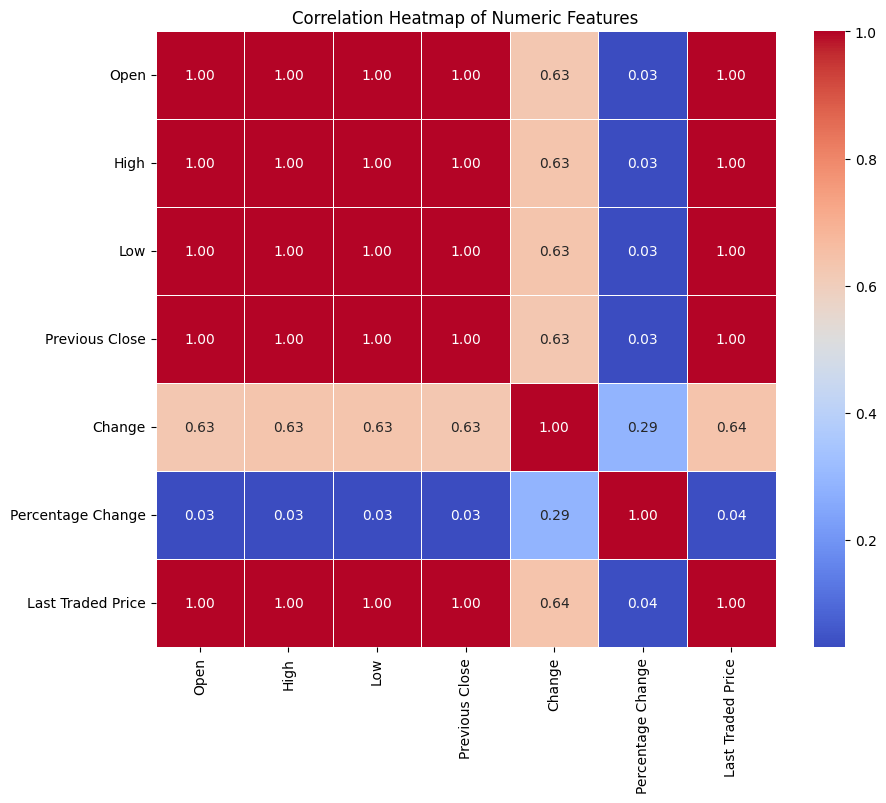

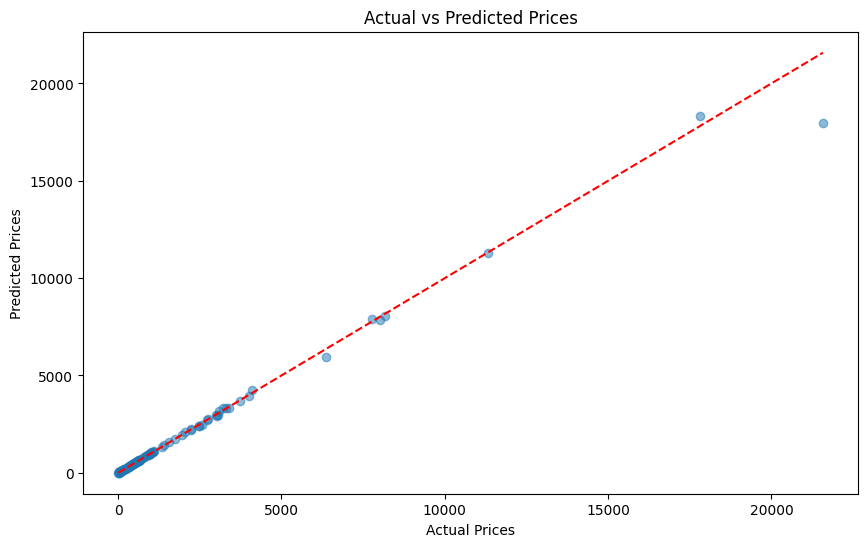

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
stock_data = pd.read_excel('/content/nifty_500.csv')

# Convert all relevant numeric columns to numeric types
numeric_columns = ['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Last Traded Price']
stock_data[numeric_columns] = stock_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values in numeric columns
stock_data[numeric_columns] = stock_data[numeric_columns].fillna(stock_data[numeric_columns].mean())

# 1. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = stock_data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Split data for prediction model (if needed)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and target for regression
X = stock_data[['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change']]
y = stock_data['Last Traded Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# 2. Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
